## Vector Autoregression (VAR) Model

In [38]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt

## Apple Data Analysis

In [39]:
# Load multivariate time series data (e.g., Apple stock prices and another variable like volume)
apple_data = pd.read_csv('data/AAPL.csv', parse_dates=['Date'], index_col='Date')

apple_data

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-09,0,27.407523,27.751425,27.405200,27.649183,134247600
2017-01-10,1,27.598065,27.739809,27.488855,27.677071,97848400
2017-01-11,2,27.591087,27.867603,27.558556,27.825777,110354400
2017-01-12,3,27.628269,27.721216,27.467936,27.709597,108344800
2017-01-13,4,27.677066,27.795573,27.607356,27.660801,104447600
...,...,...,...,...,...,...
2024-06-12,1868,207.369995,220.199997,206.899994,213.070007,198134300
2024-06-13,1869,214.740005,216.750000,211.600006,214.240005,97862700
2024-06-14,1870,213.850006,215.169998,211.300003,212.490005,70122700


### Check Stationarity

In [40]:
result = adfuller(apple_data['Close'])

print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: -0.16749913317425194, p-value: 0.9422863752570497


### Make Data Stationary

In [41]:
# Decompose the time series using additive model
decomposition = seasonal_decompose(apple_data['Close'], model='additive', period=365)

# Extract the trend component
trend = decomposition.trend

# Subtract the trend component from the original series
apple_data['Stationary'] = apple_data['Close'] - trend

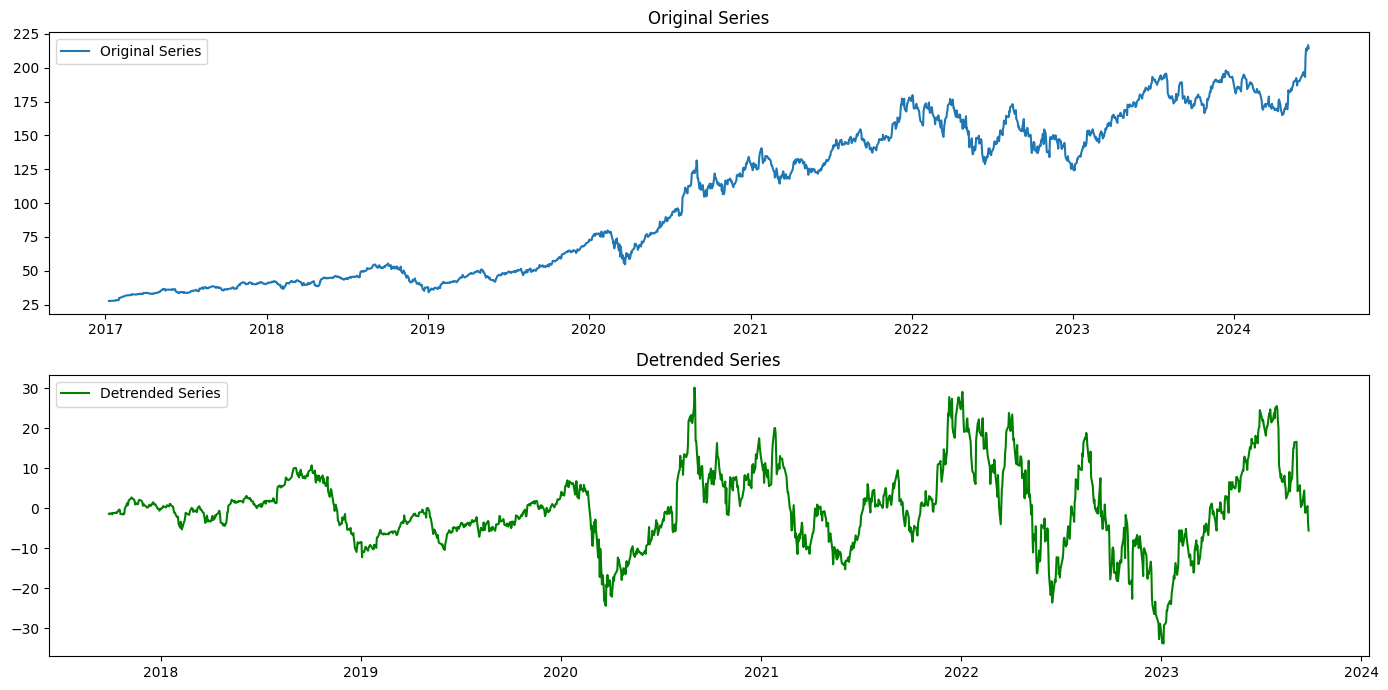

In [42]:
# Plot the original series, trend, and detrended series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(apple_data['Close'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')


plt.subplot(2, 1, 2)
plt.plot(apple_data['Stationary'], label='Detrended Series', color='green')
plt.title('Detrended Series')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [43]:
# Apply again the ADF test
apple_detrended_series_clean = apple_data['Stationary'].dropna()

result = adfuller(apple_detrended_series_clean)

print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: -4.131670100912887, p-value: 0.0008581452374582233


### Calculate Autocorrelation

<Figure size 1000x500 with 0 Axes>

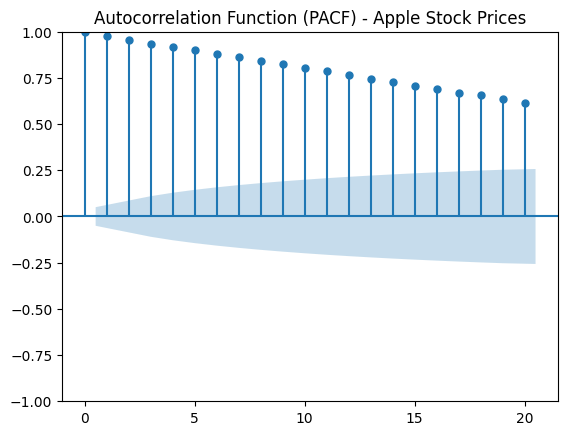

In [44]:
# Plot the PACF for Apple stock price series
plt.figure(figsize=(10, 5))
plot_acf(apple_detrended_series_clean, lags=20)
plt.title('Autocorrelation Function (PACF) - Apple Stock Prices')
plt.show()

## Google Data Analysis

In [45]:
# Load multivariate time series data (e.g., Apple stock prices and another variable like volume)
google_data = pd.read_csv('data/GOOGL.csv', parse_dates=['Date'], index_col='Date')

google_data

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-09,0,41.271134,41.473900,41.033907,41.311588,28178000
2017-01-10,1,41.306095,41.422962,41.109822,41.253155,23948000
2017-01-11,2,41.283622,41.447431,41.026417,41.445435,26508000
2017-01-12,3,41.371518,41.471406,41.003441,41.428955,26990000
2017-01-13,4,41.502365,41.684655,41.428453,41.499371,25804000
...,...,...,...,...,...,...
2024-06-12,1868,178.250000,180.410004,176.110001,177.789993,27864700
2024-06-13,1869,176.110001,176.740005,174.880005,175.160004,20913300
2024-06-14,1870,174.220001,177.059998,174.149994,176.789993,18063600


### Check Stationarity

In [46]:
result = adfuller(google_data['Close'])

print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: 0.20347529085206237, p-value: 0.9724558401866943


### Make Data Stationarity

In [47]:
# Decompose the time series using additive model
decomposition = seasonal_decompose(google_data['Close'], model='additive', period=365)

# Extract the trend component
trend = decomposition.trend

# Subtract the trend component from the original series
google_data['Stationary'] = google_data['Close'] - trend

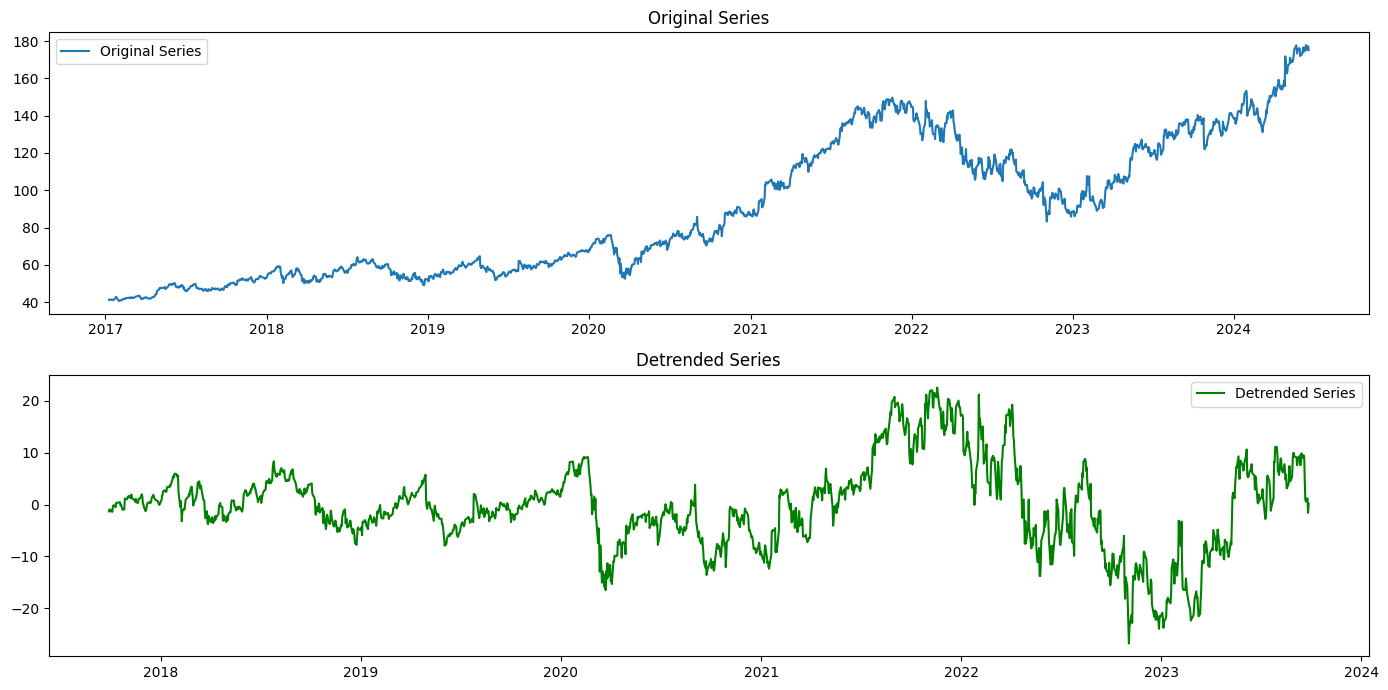

In [48]:
# Plot the original series, trend, and detrended series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(google_data['Close'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')


plt.subplot(2, 1, 2)
plt.plot(google_data['Stationary'], label='Detrended Series', color='green')
plt.title('Detrended Series')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [49]:
# Apply again the ADF test
google_detrended_series_clean = google_data['Stationary'].dropna()

result = adfuller(google_detrended_series_clean)

print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

ADF Statistic: -2.756123669803262, p-value: 0.06481965359168956


### Calculate Autocorrelation

<Figure size 1000x500 with 0 Axes>

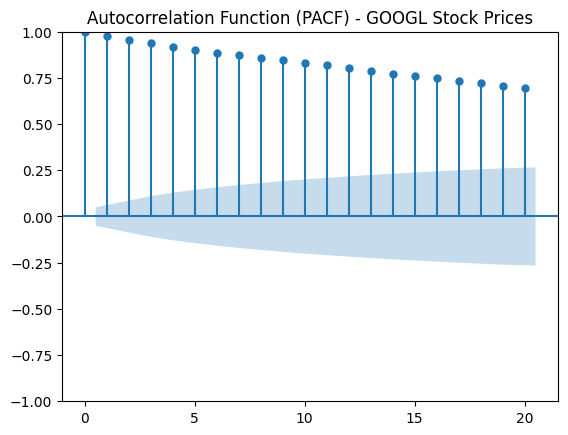

In [50]:
# Plot the PACF for Apple stock price series
plt.figure(figsize=(10, 5))
plot_acf(google_detrended_series_clean, lags=20)
plt.title('Autocorrelation Function (PACF) - GOOGL Stock Prices')
plt.show()

## Fit VAR Model

### Create dataset

In [51]:
dates = apple_data.index

# Making both datasets the same size by downsampling
offset = len(apple_detrended_series_clean.values) if len(apple_detrended_series_clean.values) <= len(google_detrended_series_clean.values) else len(google_detrended_series_clean.values)
data = pd.DataFrame(dates[:offset], columns=['Date'])
clered_apple_data = apple_detrended_series_clean.values[:offset]
cleared_google_data = google_detrended_series_clean.values[:offset]

# Creating training and testing sets
train_offset = int(len(data)*0.8)
apple_train = clered_apple_data[:train_offset]
apple_test = clered_apple_data[train_offset:]
google_train = cleared_google_data[:train_offset]
google_test = cleared_google_data[train_offset:]

In [52]:
## Create the train data

train_data = data.iloc[:train_offset]

train_data['Apple'] = apple_train
train_data['Google'] = google_train

train_data.set_index('Date', inplace=True)

train_data

C:\Users\jacob\AppData\Local\Temp\ipykernel_12616\3010304819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Apple'] = apple_train
C:\Users\jacob\AppData\Local\Temp\ipykernel_12616\3010304819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Google'] = google_train


,Apple,Google
Date,,
2017-01-09,-1.441783,-1.334557
2017-01-10,-1.289323,-0.936400
2017-01-11,-1.407000,-1.295512
2017-01-12,-1.291916,-1.107614
2017-01-13,-1.571503,-1.413784
...,...,...
2021-10-18,-9.581872,-0.346536
2021-10-19,-8.655096,-1.893776
2021-10-20,-9.072430,-4.451334


In [53]:
## Create the test data

test_data = data.iloc[train_offset:]

test_data['Apple'] = apple_test
test_data['Google'] = google_test

test_data.set_index('Date', inplace=True)

test_data

C:\Users\jacob\AppData\Local\Temp\ipykernel_12616\822444735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Apple'] = apple_test
C:\Users\jacob\AppData\Local\Temp\ipykernel_12616\822444735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Google'] = google_test


,Apple,Google
Date,,
2021-10-25,-7.645673,-6.488631
2021-10-26,-3.794420,-1.629257
2021-10-27,-1.809345,-1.446422
2021-10-28,0.443701,-0.893150
2021-10-29,-0.842919,-7.220631
...,...,...
2022-12-29,-1.141992,0.994289
2022-12-30,-0.518490,0.566661
2023-01-03,0.539555,1.182778


In [54]:
model = VAR(train_data)
var_result = model.fit(maxlags=20, ic='aic')  # Use AIC to select lag order

print(var_result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Oct, 2024
Time:                     17:33:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.94354
Nobs:                     1195.00    HQIC:                   1.81092
Log likelihood:          -4375.38    FPE:                    5.64490
AIC:                      1.73074    Det(Omega_mle):         5.41592
--------------------------------------------------------------------
Results for equation Apple
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.000641         0.056643            0.011           0.991
L1.Apple           1.003805         0.038395           26.144           0.000
L1.Google         -0.099145         0.046758           -2.120           

c:\Users\jacob\Documents\Simplicity\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
# Select the optimal lag length based on AIC (or BIC)
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        8.052       8.060       3139.       8.055
1        1.751      1.777*       5.763      1.761*
2        1.751       1.793       5.758       1.767
3        1.756       1.815       5.787       1.778
4        1.758       1.835       5.803       1.787
5        1.760       1.854       5.815       1.796
6        1.761       1.872       5.821       1.803
7        1.751       1.879       5.763       1.800
8        1.747       1.892       5.740       1.802
9        1.739       1.901       5.692       1.800
10       1.740       1.919       5.695       1.807
11       1.739       1.936       5.695       1.813
12      1.736*       1.949      5.674*       1.816
13       1.742       1.972       5.707       1.829
14       1.744       1.991       5.719       1.837
15       1.747       2.011       5.737       1.847
-------------------------------

In [56]:
# Forecasting the next 10 periods (e.g., days)
forecast = var_result.forecast(test_data.values[-lag_order.aic:], steps=100)

# Convert the forecasted values to a DataFrame for better interpretation
forecast_df = pd.DataFrame(
    forecast,
    index=pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=100, freq='D'),
    columns=['Apple', 'Google'])

# Print the forecasted values
print(forecast_df)


               Apple    Google
2023-01-06 -4.934571  0.320137
2023-01-07 -4.106508  0.864199
2023-01-08 -3.760705  0.887937
2023-01-09 -3.419377  1.010743
2023-01-10 -3.220748  1.138278
...              ...       ...
2023-04-11  0.320099  1.808776
2023-04-12  0.329488  1.800952
2023-04-13  0.338501  1.793048
2023-04-14  0.347166  1.785083
2023-04-15  0.355481  1.777055

[100 rows x 2 columns]


## Evaluate Model

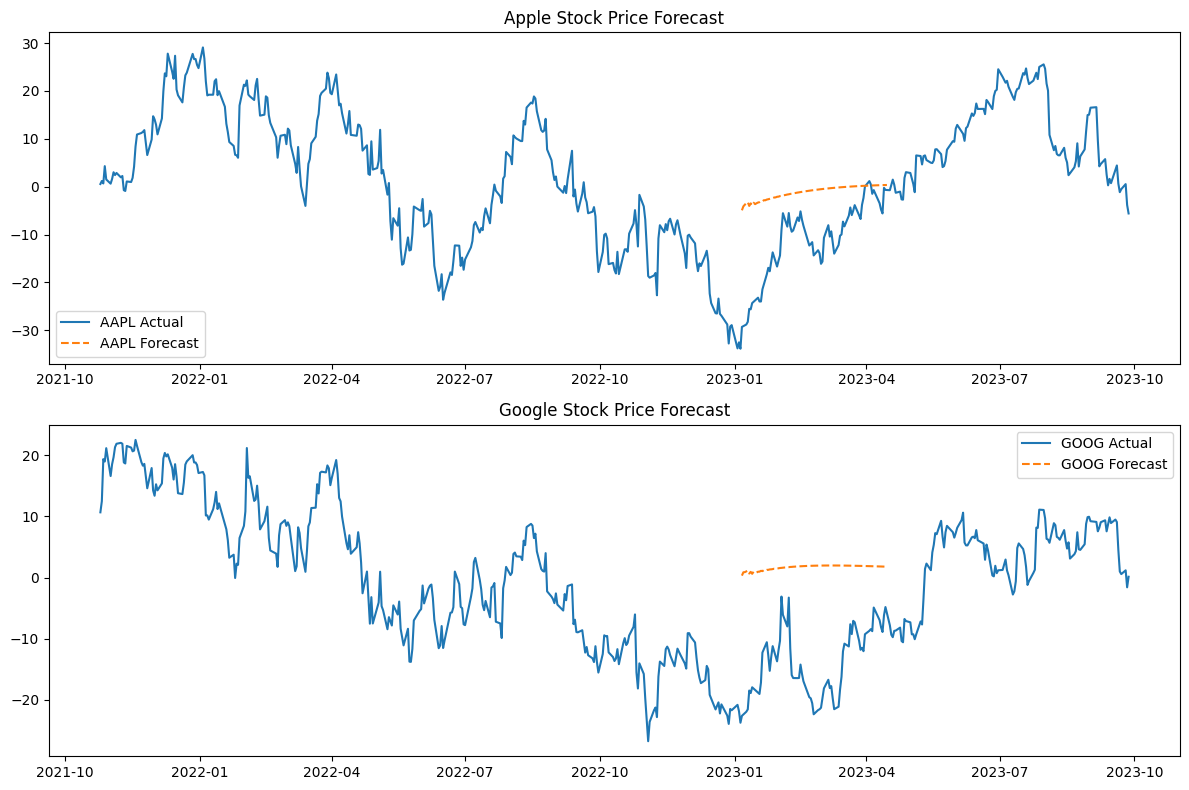

In [57]:
# Plot the forecasted stock prices and volumes
plt.figure(figsize=(12, 8))

# Apple stock price forecast
plt.subplot(2, 1, 1)
plt.plot(apple_data['Stationary'][train_offset:], label='AAPL Actual')
plt.plot(forecast_df['Apple'], label='AAPL Forecast', linestyle='--')
plt.title('Apple Stock Price Forecast')
plt.legend()

# Google stock price forecast
plt.subplot(2, 1, 2)
plt.plot(google_data['Stationary'][train_offset:], label='GOOG Actual')
plt.plot(forecast_df['Google'], label='GOOG Forecast', linestyle='--')
plt.title('Google Stock Price Forecast')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get the residuals from the VAR model (one series for each variable)
residuals = var_result.resid

# Iterate over each time series in the residuals
for i, column in enumerate(residuals.columns):
    print(f"Ljung-Box test for {column}:")
    
    # Apply the Ljung-Box test to each residual series
    ljungbox_test = acorr_ljungbox(residuals[column], lags=[20], return_df=True)
    
    # Print the test result
    print(ljungbox_test)
    print("\n")


Ljung-Box test for Apple:
     lb_stat  lb_pvalue
20  11.85974   0.920819


Ljung-Box test for Google:
     lb_stat  lb_pvalue
20  7.879313   0.992637




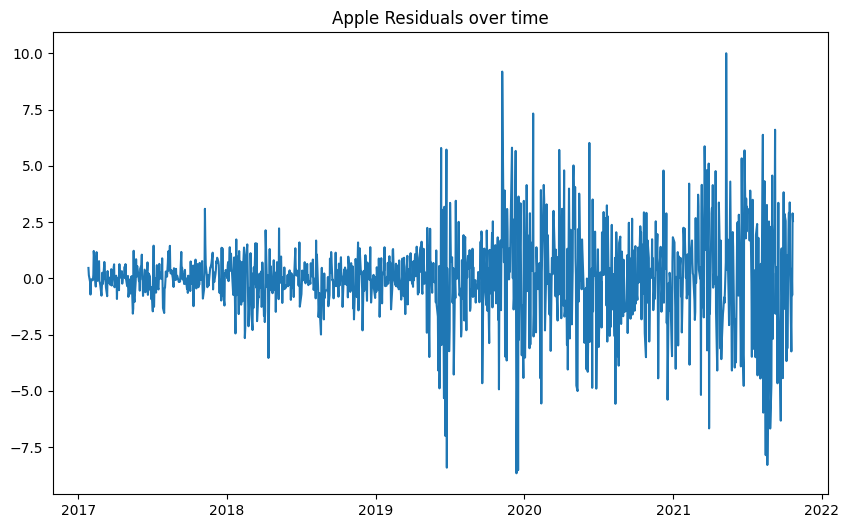

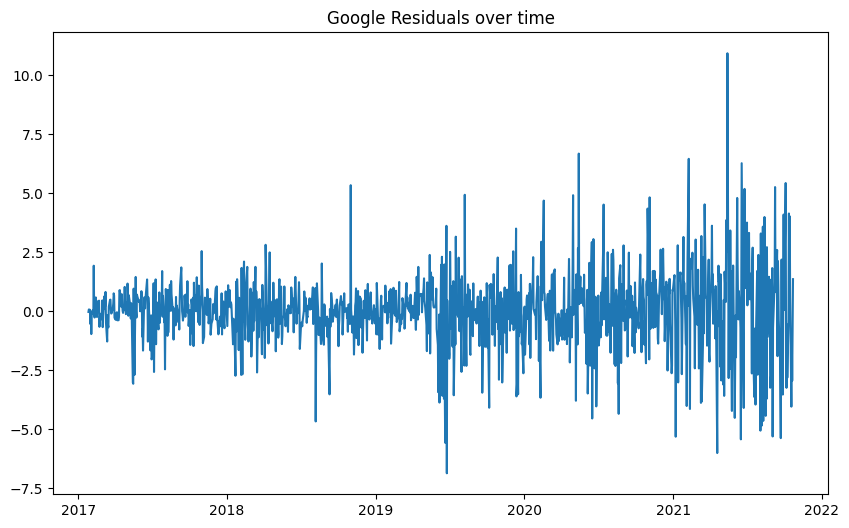

In [58]:
# Plotting Residual

residuals = var_result.resid

apple_residuals = residuals['Apple']
google_residuals = residuals['Google']

plt.figure(figsize=(10,6))
plt.plot(apple_residuals)
plt.title('Apple Residuals over time')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(google_residuals)
plt.title('Google Residuals over time')
plt.show()

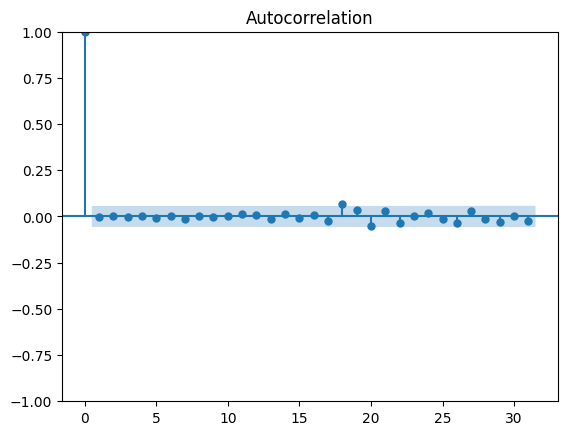

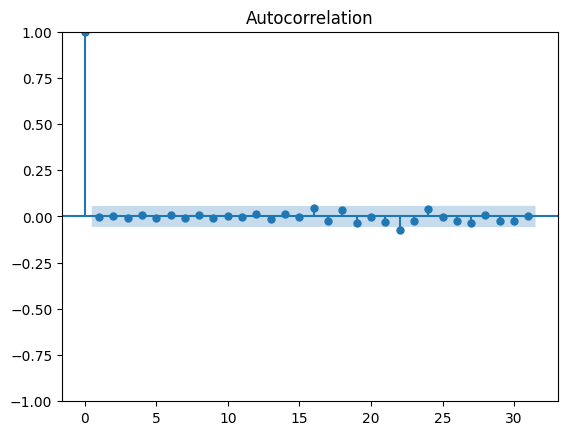

In [59]:
# Plotting Autocorrelation

plot_acf(apple_residuals)
plt.show()

plot_acf(google_residuals)
plt.show()

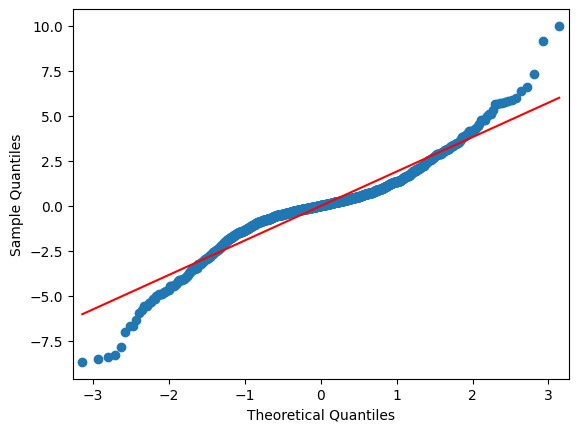

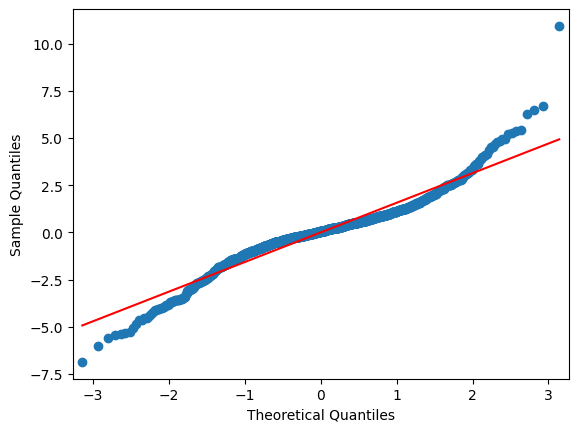

In [60]:
sm.qqplot(apple_residuals, line='s')
plt.show()


sm.qqplot(google_residuals, line='s')
plt.show()

## Using only one stock with VAR

In [61]:
# Load multivariate time series data (e.g., Apple stock prices and another variable like volume)
apple_data = pd.read_csv('data/AAPL.csv', parse_dates=['Date'], index_col='Date')

apple_data

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2017-01-09,0,27.407523,27.751425,27.405200,27.649183,134247600
2017-01-10,1,27.598065,27.739809,27.488855,27.677071,97848400
2017-01-11,2,27.591087,27.867603,27.558556,27.825777,110354400
2017-01-12,3,27.628269,27.721216,27.467936,27.709597,108344800
2017-01-13,4,27.677066,27.795573,27.607356,27.660801,104447600
...,...,...,...,...,...,...
2024-06-12,1868,207.369995,220.199997,206.899994,213.070007,198134300
2024-06-13,1869,214.740005,216.750000,211.600006,214.240005,97862700
2024-06-14,1870,213.850006,215.169998,211.300003,212.490005,70122700


In [62]:
## Make data stationary

# Decompose the time series using additive model
decomposition = seasonal_decompose(apple_data['Close'], model='additive', period=365)

# Extract the trend component
trend = decomposition.trend

# Subtract the trend component from the original series
apple_data['Stationary'] = apple_data['Close'] - trend

In [63]:
data = pd.DataFrame(apple_data['Stationary'])

# Create lagged features
for i in range(1, 21): # 20 lags
    data[f'lag_{i}'] = data['Stationary'].shift(i)

# Drop rows with NaN values (due to shifting)
data = data.dropna()

In [64]:
## Splitting the data

train_split = int(len(data)*0.8)
train_data = data.iloc[:train_split]
test_data = data.iloc[train_split:]

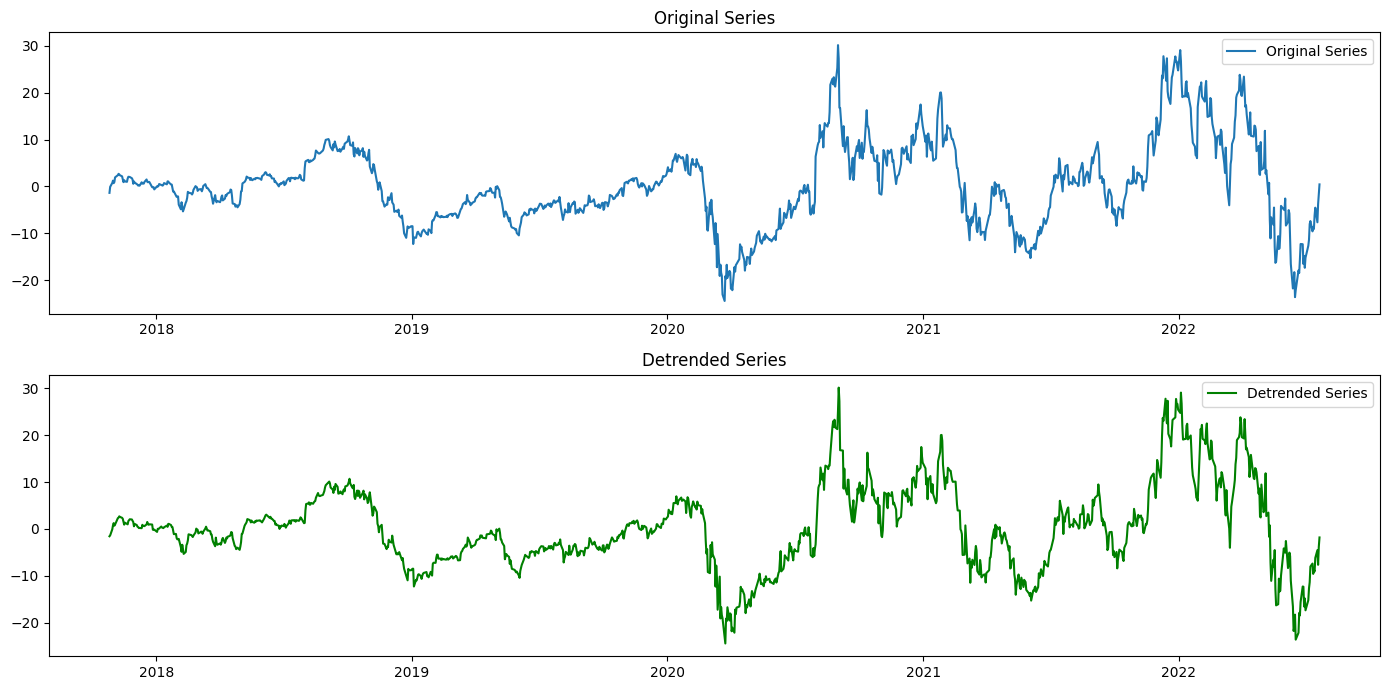

In [65]:
# Plot the original series, trend, and detrended series
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data['Stationary'], label='Original Series')
plt.title('Original Series')
plt.legend(loc='best')


plt.subplot(2, 1, 2)
plt.plot(train_data['lag_1'], label='Detrended Series', color='green')
plt.title('Detrended Series')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [66]:
# Fit a VAR model (even though it’s only one variable with its lags)
model = VAR(train_data)

c:\Users\jacob\Documents\Simplicity\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
# Select optimal lag order using AIC or BIC
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        31.42       31.51   4.404e+13       31.45
1      -1327.*     -1325.*      0.000*     -1326.*
2       -1316.      -1312.       0.000      -1314.
3       -1309.      -1303.       0.000      -1306.
4       -1305.      -1297.       0.000      -1302.
5       -1308.      -1298.       0.000      -1304.
6       -1298.      -1287.       0.000      -1294.
7       -1310.      -1297.       0.000      -1305.
8       -1301.      -1286.       0.000      -1296.
9       -1303.      -1286.       0.000      -1296.
10      -1296.      -1277.       0.000      -1288.
11      -1293.      -1272.       0.000      -1285.
12      -1285.      -1262.       0.000      -1276.
13      -1286.      -1262.       0.000      -1277.
14      -1288.      -1261.       0.000      -1278.
15      -1282.      -1253.       0.000      -1271.
-------------------------------

In [68]:
# Fit the model using the chosen lag length
var_result = model.fit(lag_order.aic)
print(var_result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 13, Oct, 2024
Time:                     17:35:53
--------------------------------------------------------------------
No. of Equations:         21.0000    BIC:                   -1322.11
Nobs:                     1190.00    HQIC:                  -1323.34
Log likelihood:           752832.    FPE:                    0.00000
AIC:                     -1324.08    Det(Omega_mle):         0.00000
--------------------------------------------------------------------
Results for equation Stationary
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.012466         0.057141            0.218           0.827
L1.Stationary         0.939046         0.029260           32.093           0.000
L1.lag_1              0.021223         0.040104        

In [69]:
# Forecast future stock prices using the VAR model (e.g., forecast next 5 days)
forecast = var_result.forecast(test_data.values[-var_result.k_ar:], steps=100)

forecast.shape

# Convert forecast to DataFrame for readability
forecast_df = pd.DataFrame(
    forecast,
    index=pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=100, freq='D'),
    columns=['Apple'] + [f'lag_{i}' for i in range(1, 21)])

# Print the forecasted stock prices
print(forecast_df[['Apple']])  # Focus on the predicted stock prices

               Apple
2022-07-22 -5.656284
2022-07-23 -5.371412
2022-07-24 -5.822193
2022-07-25 -6.344312
2022-07-26 -5.958053
...              ...
2022-10-25  0.146487
2022-10-26  0.158822
2022-10-27  0.170724
2022-10-28  0.182110
2022-10-29  0.193014

[100 rows x 1 columns]


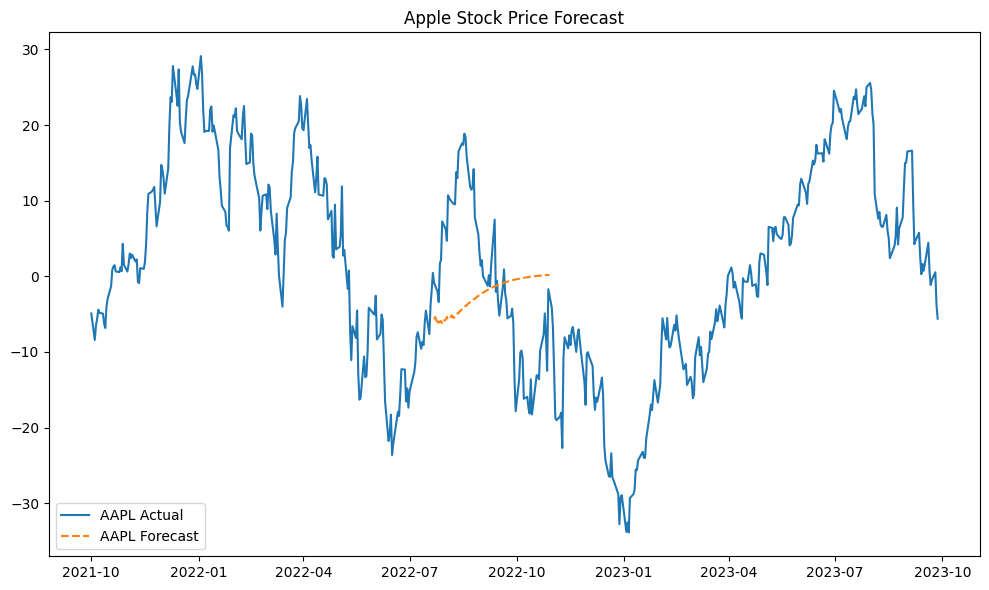

In [70]:
# Plot the forecasted stock prices and volumes
plt.figure(figsize=(10, 6))

# Apple stock price forecast
plt.plot(apple_data['Stationary'][train_split:], label='AAPL Actual')
plt.plot(forecast_df['Apple'], label='AAPL Forecast', linestyle='--')
plt.title('Apple Stock Price Forecast')
plt.legend()


plt.tight_layout()
plt.show()


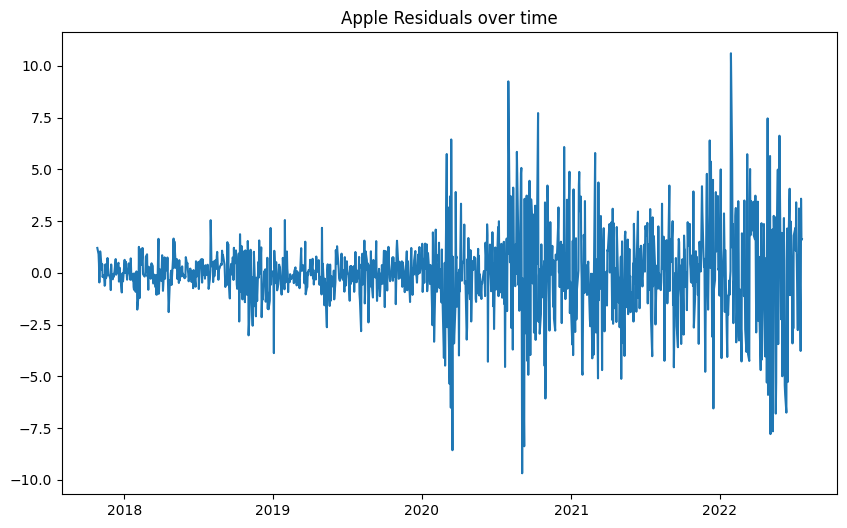

In [71]:
# Plotting Residual

residuals = var_result.resid


apple_residuals = residuals['Stationary']

plt.figure(figsize=(10,6))
plt.plot(apple_residuals)
plt.title('Apple Residuals over time')
plt.show()

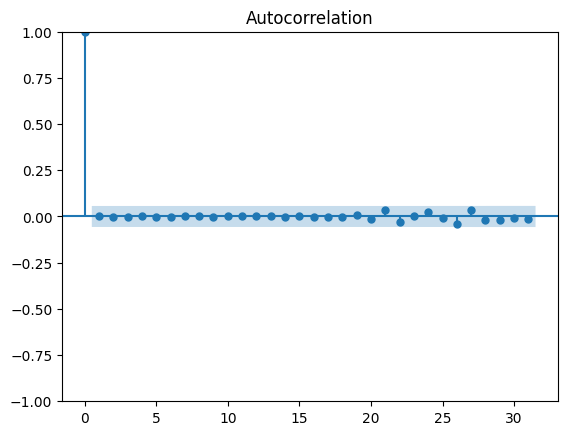

In [72]:
# Plotting Autocorrelation

plot_acf(apple_residuals)
plt.show()


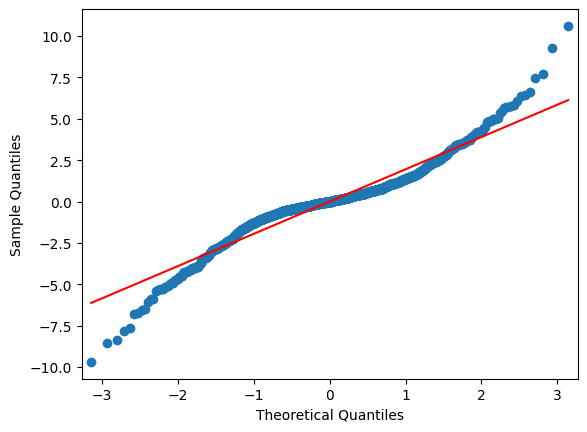

In [73]:
sm.qqplot(apple_residuals, line='s')
plt.show()
